## Exploratory Data Analysis

### Import Libraries

In [1]:
using ScikitLearn: fit!,predict,@sk_import
using DataFrames
using Gadfly
using CSV

### Import Dataset

In [2]:
heart = CSV.read("C:/Users/Akunna Anyamkpa/Downloads/Heart/heart.csv",DataFrame)
first(heart,10)

Row,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,Int64,String1,String3,Int64,Int64,Int64,String7,Int64,String1,Float64,String7,Int64
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
7,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
8,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
9,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1


### Confirm If It's a DataFrame

In [3]:
typeof(heart)

DataFrame

### Checking for relationship between features

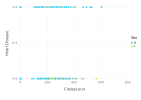

In [4]:
plot(heart,x = "Cholesterol", y = "HeartDisease",Geom.point, color = "Sex")

### Feature Engineering

#### Independent features

In [5]:
X = [:RestingBP,:Cholesterol,:MaxHR,:Age,:Oldpeak]
X_features = heart[:, X]
first(X_features,5)

Row,RestingBP,Cholesterol,MaxHR,Age,Oldpeak
,Int64,Int64,Int64,Int64,Float64
1,140,289,172,40,0.0
2,160,180,156,49,1.0
3,130,283,98,37,0.0
4,138,214,108,48,1.5
5,150,195,122,54,0.0


#### Dependent features (target)

In [6]:
Y_feature = heart[:, :HeartDisease]
first(Y_feature,5)

5-element Vector{Int64}:
 0
 1
 0
 1
 0

### Convert Features to Array

#### Independent features to array

In [7]:
X_features = Matrix(X_features)
first(X_features,5)

5-element Vector{Float64}:
 140.0
 160.0
 130.0
 138.0
 150.0

#### Dependent features to array

In [8]:
Y_feature = convert(Array, heart[!,:HeartDisease])
first(Y_feature,5)

5-element Vector{Int64}:
 0
 1
 0
 1
 0

## Model Training and Building

In [9]:
@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model._logistic.LogisticRegression'>

### Instantiate and Fit the model

In [10]:
model = LogisticRegression(fit_intercept=true, max_iter=1000)
fit!(model, X_features, Y_feature)

PyObject LogisticRegression(max_iter=1000)

### Model Evaluation

In [13]:
accuracy = sum(predict(model, X_features) .== Y_feature) / length(Y_feature)
println("Accuracy of model: $accuracy")

Accuracy of model: 0.7592592592592593


### Cross Validation to find best model

In [14]:
using ScikitLearn.CrossValidation: cross_val_score

cross_val_score(LogisticRegression(max_iter=1000), X_features, Y_feature; cv=3) 

3-element Vector{Float64}:
 0.749185667752443
 0.761437908496732
 0.6983606557377049